# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
data_raw = pd.read_csv('../data/states_edu.csv')
data_raw.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
data = data_raw.dropna(subset=['AVG_MATH_4_SCORE'])
data.head
# choosing to index specifically based on AVG_MATH_4_SCORE because that will be my response variable

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
5          1992_COLORADO       COLORADO  1992     NaN      3185173.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [4]:
data['AVG_MATH_4_SCORE'].shape[0]

565

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
if (data.loc[data['STATE'] == 'MICHIGAN', 'AVG_MATH_4_SCORE'].mean() > data.loc[data['STATE'] == 'OHIO', 'AVG_MATH_4_SCORE'].mean()) :
    print ("Michigan's score is higher :D")
else :
    print ("Ohio's score is higher D:")

Ohio's score is higher D:


Find the average for your chosen test across all states in 2019

In [6]:
# data in 2019 is missing lots of data, so is excluded by dropna(), choosing instead to use raw data here
data.loc[data['YEAR'] == 2019, 'AVG_MATH_4_SCORE'].mean()

239.9433962264151

For each state, find a maximum value for your chosen test score

In [15]:
data_by_state = data.groupby('STATE')
data_by_state['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [33]:
data_raw['TOTAL_EXPENDITURE_PER_STUDENT'] = data_raw['TOTAL_EXPENDITURE'] / data_raw['ENROLL']
data_raw['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = data_raw['INSTRUCTION_EXPENDITURE'] / data_raw['ENROLL']
data_raw['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = data_raw['SUPPORT_SERVICES_EXPENDITURE'] / data_raw['ENROLL']
data_raw['GROSS_PROFIT'] = data_raw['TOTAL_REVENUE'] - data_raw['TOTAL_EXPENDITURE']
data_raw['PERCENT_EXPENDITURE_ON_INSTRUCTION'] = data_raw['INSTRUCTION_EXPENDITURE'] / data_raw['TOTAL_EXPENDITURE']
data_raw['PERCENT_EXPENDITURE_ON_SUPPORT_SERVICES'] = data_raw['SUPPORT_SERVICES_EXPENDITURE'] / data_raw['TOTAL_EXPENDITURE']
data_raw['PERCENT_REVENUE_LOCAL'] = data_raw['SUPPORT_SERVICES_EXPENDITURE'] / data_raw['TOTAL_EXPENDITURE']

# going forward, i want *all* NaNs removed, not just those in AVG_4_MATH_SCORE, so i'll re-clean the data here
data = data_raw.dropna()
data.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR     ENROLL  TOTAL_REVENUE  \
561         2003_ALABAMA        ALABAMA  2003   727900.0      5196054.0   
562          2003_ALASKA         ALASKA  2003   133303.0      1425948.0   
563         2003_ARIZONA        ARIZONA  2003   875111.0      6529894.0   
564        2003_ARKANSAS       ARKANSAS  2003   450158.0      3241275.0   
565      2003_CALIFORNIA     CALIFORNIA  2003  6226552.0     59815855.0   
...                  ...            ...   ...        ...            ...   
1219       2015_VIRGINIA       VIRGINIA  2015  1279867.0     15857524.0   
1220     2015_WASHINGTON     WASHINGTON  2015  1072359.0     13709442.0   
1221  2015_WEST_VIRGINIA  WEST_VIRGINIA  2015   279565.0      3478401.0   
1222      2015_WISCONSIN      WISCONSIN  2015   861813.0     11637376.0   
1223        2015_WYOMING        WYOMING  2015    93867.0      1962874.0   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITUR

Feature engineering justification: **I chose to add a measure of total expenditure per student, as well as intruction expenditure and support services expenditure in order to normalize between student population sizes, as some states will always have more population and therefore more students than other states. I also chose to add gross profit to see how closely states are running their budgets, and to identify states that are running into the red. I chose to add columns for percent of expenditure spent on instruction and support services, repsectively, as it can be telling for how educators are paid in the state, which could correlate with scores. Lastly, I added a column for percent of revenue that is local, as local revenue from schools comes mainly from property taxes, and therefore can be used as a measure of the average wealth of the state**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

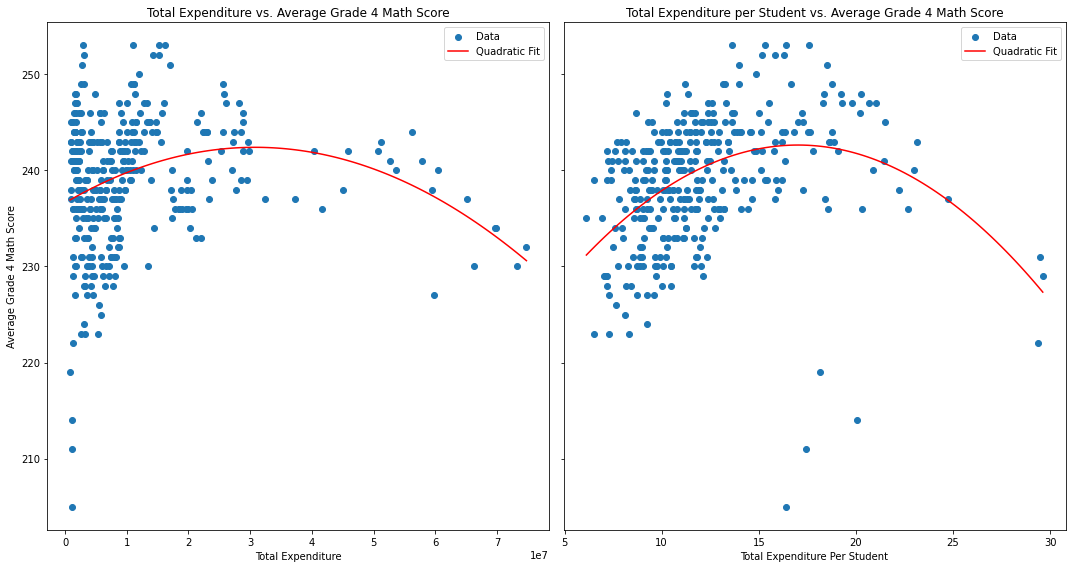

In [56]:
# Make a subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Plot the data
axes[0].scatter(data['TOTAL_EXPENDITURE'], data['AVG_MATH_4_SCORE'], label='Data')
axes[1].scatter(data['TOTAL_EXPENDITURE_PER_STUDENT'], data['AVG_MATH_4_SCORE'], label='Data')

# Generate regression function (I chose quadratic given the shape of the data)
coefficients0 = np.polyfit(data['TOTAL_EXPENDITURE'], data['AVG_MATH_4_SCORE'], 2)
quadtratic_function0 = np.poly1d(coefficients0)
coefficients1 = np.polyfit(data['TOTAL_EXPENDITURE_PER_STUDENT'], data['AVG_MATH_4_SCORE'], 2)
quadratic_function1 = np.poly1d(coefficients1)

# Generate values
x_curve0 = np.linspace(min(data['TOTAL_EXPENDITURE']), max(data['TOTAL_EXPENDITURE']), 100)
x_curve1 = np.linspace(min(data['TOTAL_EXPENDITURE_PER_STUDENT']), max(data['TOTAL_EXPENDITURE_PER_STUDENT']), 100)

# Plot curve
axes[0].plot(x_curve0, quadratic_function0(x_curve0), color='red', label='Quadratic Fit')
axes[1].plot(x_curve1, quadratic_function(x_curve1), color='red', label='Quadratic Fit')

axes[0].set_xlabel('Total Expenditure')
axes[0].set_ylabel('Average Grade 4 Math Score')
axes[0].set_title('Total Expenditure vs. Average Grade 4 Math Score')
axes[1].set_xlabel('Total Expenditure Per Student')
axes[1].set_title('Total Expenditure per Student vs. Average Grade 4 Math Score')

# Display with legend
plt.tight_layout()
axes[0].legend()
axes[1].legend()
plt.show()

**Side-by-side charts showing the relationship between total expenditure and Average Grade 4 Math Score. The right chart uses the total expenditure per student to account for differences in student population size.**

**Visualization 2**

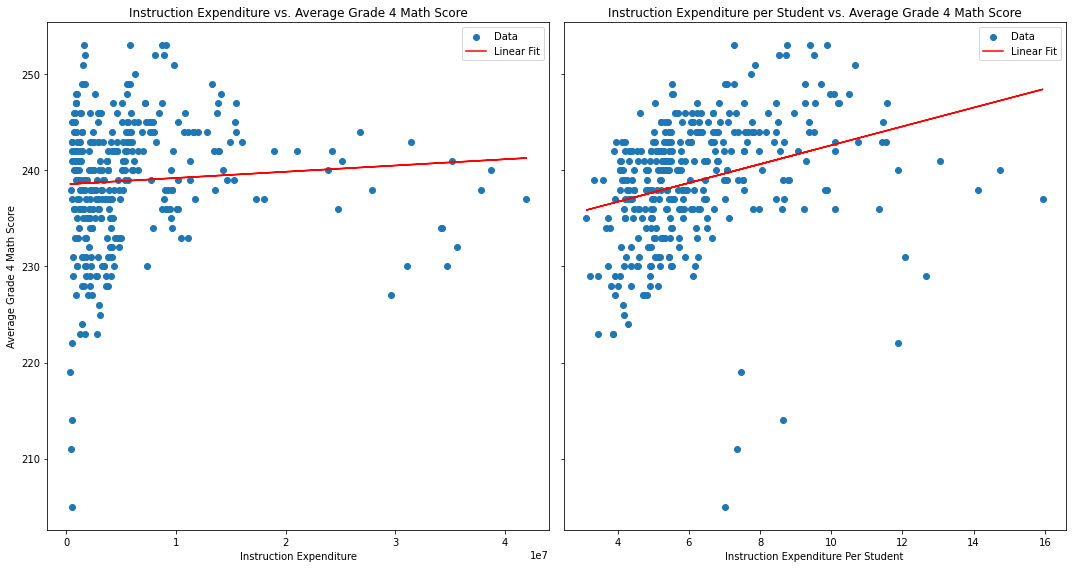

In [59]:
# Make a subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Plot the data
axes[0].scatter(data['INSTRUCTION_EXPENDITURE'], data['AVG_MATH_4_SCORE'], label='Data')
axes[1].scatter(data['INSTRUCTION_EXPENDITURE_PER_STUDENT'], data['AVG_MATH_4_SCORE'], label='Data')

# Generate regression function (I chose linear given the shape of the data)
coefficients0 = np.polyfit(data['INSTRUCTION_EXPENDITURE'], data['AVG_MATH_4_SCORE'], 1)
linear_function0 = np.poly1d(coefficients0)
coefficients1 = np.polyfit(data['INSTRUCTION_EXPENDITURE_PER_STUDENT'], data['AVG_MATH_4_SCORE'], 1)
linear_function1 = np.poly1d(coefficients1)

# Generate values
ypred0 = linear_function0(data['INSTRUCTION_EXPENDITURE'])
ypred1 = linear_function1(data['INSTRUCTION_EXPENDITURE_PER_STUDENT'])

# Plot curve
axes[0].plot(data['INSTRUCTION_EXPENDITURE'], ypred0, color='red', label='Linear Fit')
axes[1].plot(data['INSTRUCTION_EXPENDITURE_PER_STUDENT'], ypred1, color='red', label='Linear Fit')

axes[0].set_xlabel('Instruction Expenditure')
axes[0].set_ylabel('Average Grade 4 Math Score')
axes[0].set_title('Instruction Expenditure vs. Average Grade 4 Math Score')
axes[1].set_xlabel('Instruction Expenditure Per Student')
axes[1].set_title('Instruction Expenditure per Student vs. Average Grade 4 Math Score')

# Display with legend
plt.tight_layout()
axes[0].legend()
axes[1].legend()
plt.show()

**Side-by-side charts showing the relationship between instruction expenditure and Average Grade 4 Math Score. The right chart uses the instruction expenditure per student to account for differences in student population size.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [60]:
from sklearn.model_selection import train_test_split

In [95]:
X = data[['TOTAL_EXPENDITURE_PER_STUDENT','INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = data.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [88]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [97]:
# create your model here
model = LinearRegression()

In [98]:
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [100]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

2.5579538487363607e-13
[-8.64687806e-17  8.32667268e-16  1.00000000e+00]
1.0
-6.640586315514955e-15
6.640586315514955e-15
1.3738151793712398e-14


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

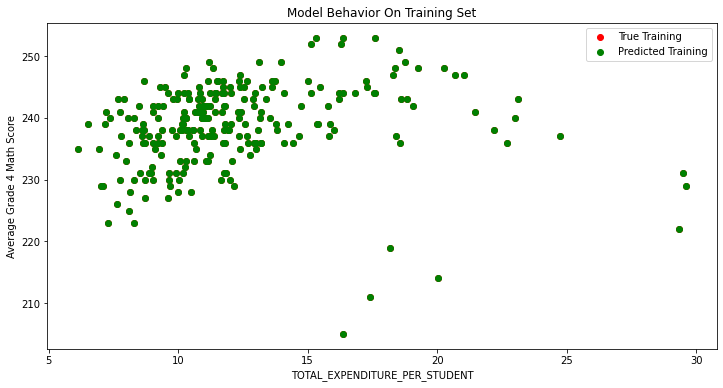

In [105]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

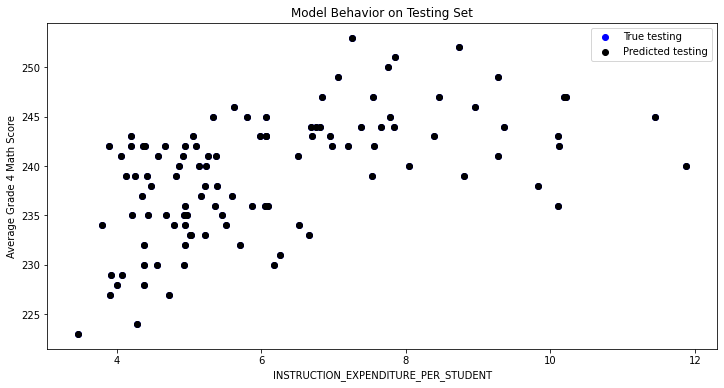

In [104]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")